In [5]:
from pyrootmemo.fit.fit_xy_powerlaw import PowerlawFitWeibull, PowerlawFitGamma, PowerlawFitGumbel, PowerlawFitUniform, PowerlawFitLognormal, PowerlawFitLognormalUncorrected, PowerlawFitNormal, PowerlawFitNormalForce, PowerlawFitNormalScaled, PowerlawFitNormalFreesd
import numpy as np
from pyrootmemo.tools.helpers import units
import matplotlib.pyplot as plt

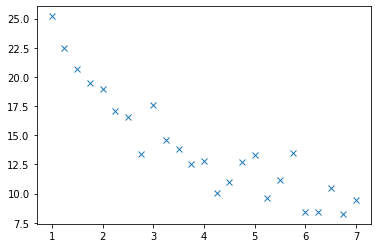

In [6]:
# generate data
rng = np.random.default_rng()
sd_multiplier = 2.0
x = np.linspace(1, 7, 25)
random_factor = rng.normal(0.0, sd_multiplier, size = len(x))
y = np.abs(25 * x**(-0.5) + random_factor)
w = rng.uniform(0.8, 1.2, len(x))
# with units - generate
xu = x * units("mm")
yu = y * units("MPa")
# show
plt.plot(x, y, 'x')

1.0 millimeter
1.0 megapascal
25.597339796242323 megapascal
-0.5107104324998426
2.9381842285462616 megapascal
-0.5107104324998426
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[22.6858447  28.5088349 ]
 [15.1806655  16.88148994]
 [12.0257282  13.19435475]
 [10.08874594 11.34577985]
 [ 8.7819349  10.16872963]], 'megapascal')>)


True

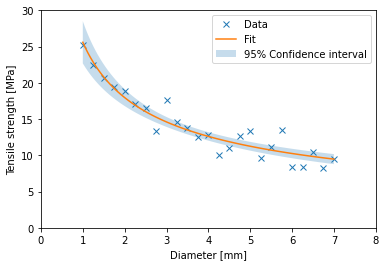

In [7]:
# Normal - strength
N = PowerlawFitNormalScaled(xu, yu)
print(N.x0)
print(N.y0)
print(N.multiplier)
print(N.exponent)
print(N.sd_multiplier)
print(N.sd_exponent)
# print(N.random(np.array([2, 3, 4]) * units('mm')))
# print(N.density())
# print(N.density(cumulative = True))
# print(N.ks_distance())
# print(N.loglikelihood(deriv = 0))
# print(N.loglikelihood(deriv = 1))
# print(N.loglikelihood(deriv = 2))
# print(N.covariance())
# print(N.covariance(method = 'bootstrap', n = 1000))
# print(N.prediction_interval(n = 5))
print(N.confidence_interval(n = 5))
# xc, yc = N.confidence_interval(n = 5)
# from pint import Quantity
# print(isinstance(yc, Quantity))
# xp = np.linspace(np.min(N.x), np.max(N.x), 10)
# print(N.predict(xp))
# print(isinstance(xp, Quantity))
N.plot()
hasattr(N, 'confidence_interval')

1.0 millimeter
1.0 megapascal
26.28366802704802 megapascal
-0.5318328534354835
0.11286387287828868
0.847317624535749
[[ 2.23074454e+00 -5.67691248e-02  7.55754628e-04]
 [-5.67691248e-02  1.71741427e-03  1.48723482e-17]
 [ 7.55754628e-04  1.32364148e-17  2.54765076e-04]]
[[ 1.06566108e+00 -2.88224597e-02 -5.04471952e-04]
 [-2.88224597e-02  1.09233503e-03  9.81543047e-05]
 [-5.04471952e-04  9.81543047e-05  2.10592897e-04]]


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Diameter [mm]', ylabel='Tensile strength [MPa]'>)

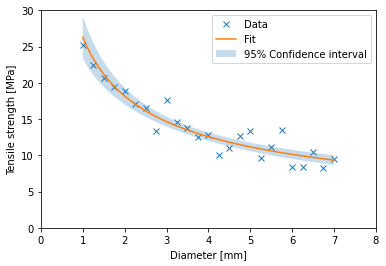

In [8]:
# Lognormal
L = PowerlawFitLognormal(xu, yu)
print(L.x0)
print(L.y0)
print(L.multiplier)
print(L.exponent)
print(L.sdlog)
#print(L.random(np.array([2, 3, 4]) * units('mm')))
#print(L.density())
#print(L.density(cumulative = True))
print(L.ks_distance())
#print(L.loglikelihood(deriv = 0))
#print(L.loglikelihood(deriv = 1))
#print(L.loglikelihood(deriv = 2))
print(L.covariance())
print(L.covariance(method = 'bootstrap', n = 100))
#print(L.prediction_interval(n = 5))
#print(L.confidence_interval(n = 5))
L.plot()


1.0 millimeter
1.0 megapascal
22.518393031577737 megapascal
-0.4070604113564081
9.993210445274148 megapascal
[17.102491875110328 17.24641147870235 11.681408616057894] megapascal
0.9173370530189732
-44.7494140739273
-34.35889106219444
None
[[ 1.12099558e+01 -3.11381754e-01  6.59529324e-01]
 [-3.11381754e-01  8.78392976e-03 -1.27774152e-02]
 [ 6.59529324e-01 -1.27774152e-02  8.26032828e-01]]
[[ 1.17743114e+01 -3.28312416e-01  1.31543352e+00]
 [-3.28312416e-01  9.31478944e-03 -3.02347360e-02]
 [ 1.31543352e+00 -3.02347360e-02  6.67535559e-01]]
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[17.77161807 27.26516799]
 [12.23887073 18.7768421 ]
 [10.10769628 15.50720007]
 [ 8.8788073  13.62184195]
 [ 8.04861244 12.34815926]], 'megapascal')>)
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[16.60915654 28.42762953]
 [13.76645602 17.24925681]
 [12.25947414 13.35542221]
 [10.81558265 11.68506659]
 [ 9.47855779 10.91821391]], 'megapascal')>)


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Diameter [mm]', ylabel='Tensile strength [MPa]'>)

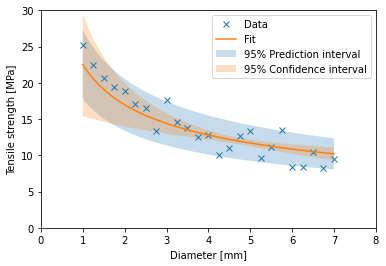

In [9]:
# Uniform
U = PowerlawFitUniform(xu, yu)
print(U.x0)
print(U.y0)
#print(U.x)
#print(U.y)
#print(U.weights)
print(U.multiplier)
print(U.exponent)
print(U.width)
print(U.random(np.array([2, 3, 4]) * units('mm')))
#print(U.density())
#print(U.density(cumulative = True))
print(U.ks_distance())
print(U.loglikelihood(deriv = 0))
print(U.loglikelihood(deriv = 1))
print(U.loglikelihood(deriv = 2))
print(U.covariance())
print(U.covariance(method = 'bootstrap', n = 100))
print(U.prediction_interval(n = 5))
print(U.confidence_interval(n = 5))
U.plot(prediction = True)

In [10]:
# Gumbel
Gb = PowerlawFitGumbel(xu, yu)
print(Gb.x0)
print(Gb.y0)
print(Gb.multiplier)
print(Gb.exponent)
print(Gb.scale0)
print(Gb.random(np.array([2, 3, 4]) * units('mm')))
#print(Gb.density())
#print(Gb.density(cumulative = True))
print(Gb.ks_distance())
#print(Gb.loglikelihood(deriv = 0))
#print(Gb.loglikelihood(deriv = 1))
#print(Gb.loglikelihood(deriv = 2))
print(Gb.covariance())
print(Gb.covariance(method = 'bootstrap', n = 100))
print(Gb.prediction_interval(n = 5))
print(Gb.confidence_interval(n = 5))

1.0 millimeter
1.0 megapascal
27.47500182965679 megapascal
-0.5675855551500429
2.536855389737045 megapascal
[23.144418918141294 13.782639005392294 12.79934591182545] megapascal
0.8100107775806982
[[ 1.80494736e+00 -4.18197557e-02  2.22711709e-01]
 [-4.18197557e-02  1.26038725e-03 -1.84055450e-03]
 [ 2.22711709e-01 -1.84055450e-03  1.66050903e-01]]
[[ 1.08421920e+04 -4.34640320e+01  8.10372043e+03]
 [-4.34640320e+01  1.78406281e-01 -3.25155813e+01]
 [ 8.10372043e+03 -3.25155813e+01  6.10359923e+03]]
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[22.69927413 35.33679683]
 [13.4941946  21.00691019]
 [10.3345463  16.0881692 ]
 [ 8.62566926 13.42789731]
 [ 7.52222863 11.71013062]], 'megapascal')>)
(<Quantity([1.  2.5 4.  5.5 7. ], 'millimeter')>, <Quantity([[24.84182296 30.1081807 ]
 [15.51090888 17.15560013]
 [11.91176002 13.10592793]
 [ 9.83883059 11.04203787]
 [ 8.47648592  9.73319289]], 'megapascal')>)


In [11]:
# gamma
G = PowerlawFitGamma(xu, yu)
print(G.multiplier)
print(G.exponent)
print(G.shape)
print(G.x0)
print(G.y0)
#print(G.random(np.array([2, 3, 4]) * units('mm')))
#print(G.density())
#print(G.density(cumulative = True))
print(G.ks_distance())
#print(G.loglikelihood(deriv = 0))
#print(G.loglikelihood(deriv = 1))
#print(G.loglikelihood(deriv = 2))
print(G.covariance())
print(G.covariance(method = 'bootstrap', n = 100))
#print(G.prediction_interval(n = 5))
#print(G.confidence_interval(n = 5))



26.061439782394 megapascal
-0.5250217859579229
77.7583985241967
1.0 millimeter
1.0 megapascal
0.8512186334375145
[[ 2.24365418e+00 -5.77951195e-02  9.88959007e-14]
 [-5.77951195e-02  1.76336251e-03 -3.01737111e-15]
 [ 9.88959007e-14 -3.01737111e-15  4.81644845e+02]]
[[ 1.30662314e+00 -4.42197508e-02 -5.15273350e-01]
 [-4.42197508e-02  1.91345367e-03 -1.65011010e-01]
 [-5.15273350e-01 -1.65011010e-01  1.38268792e+03]]


In [14]:
# Weibull
P = PowerlawFitWeibull(x, y)
print(P.colinear)
print(P.multiplier)
print(P.exponent)
print(P.shape)
print(P.x0)
print(P.y0)
print(P.random(np.array([2, 3, 4])))
print(P.ks_distance())
print(P.covariance())
print(P.covariance(method = 'bootstrap'))
print(P.confidence_interval())

False
24.13615456329454
-0.46599516578928324
9.080101051595253
1.0
1.0
[17.60360444 15.86056087 12.46831412]
0.8509794126846199
[[ 1.96189309e+00 -5.44210785e-02  1.05890395e-01]
 [-5.44210785e-02  1.89890777e-03  1.24597395e-02]
 [ 1.05890395e-01  1.24597395e-02  1.87389703e+00]]
[[ 1.32733318e+00 -4.81497563e-02  2.94045572e-01]
 [-4.81497563e-02  2.12732343e-03 -5.06533808e-03]
 [ 2.94045572e-01 -5.06533808e-03  6.04347984e+00]]
(array([1.  , 1.06, 1.12, 1.18, 1.24, 1.3 , 1.36, 1.42, 1.48, 1.54, 1.6 ,
       1.66, 1.72, 1.78, 1.84, 1.9 , 1.96, 2.02, 2.08, 2.14, 2.2 , 2.26,
       2.32, 2.38, 2.44, 2.5 , 2.56, 2.62, 2.68, 2.74, 2.8 , 2.86, 2.92,
       2.98, 3.04, 3.1 , 3.16, 3.22, 3.28, 3.34, 3.4 , 3.46, 3.52, 3.58,
       3.64, 3.7 , 3.76, 3.82, 3.88, 3.94, 4.  , 4.06, 4.12, 4.18, 4.24,
       4.3 , 4.36, 4.42, 4.48, 4.54, 4.6 , 4.66, 4.72, 4.78, 4.84, 4.9 ,
       4.96, 5.02, 5.08, 5.14, 5.2 , 5.26, 5.32, 5.38, 5.44, 5.5 , 5.56,
       5.62, 5.68, 5.74, 5.8 , 5.86, 5.92, 5.98, 6.0

In [19]:
# Weibull with units
Pu = PowerlawFitWeibull(xu, yu)
print(Pu.x0)
print(Pu.y0)
print(Pu.colinear)
print(Pu.multiplier)
print(Pu.exponent)
print(Pu.shape)
print(Pu.random(np.array([2, 3, 4]) * units("mm")))
print(Pu.ks_distance())
print(Pu.xrange())
print(Pu.predict())
print(Pu.get_scale(Pu.xrange()))
print(Pu.prediction_interval(level = 0.5))
print(Pu.covariance())
print(Pu.covariance(method = 'bootstrap'))
print(Pu.confidence_interval())


1.0 millimeter
1.0 megapascal
False
24.13615456329454 megapascal
-0.46599516578928324
9.080101051595253
[19.024143386401697 16.433751134116427 12.398943939056801] megapascal
0.8509794126846199
[1.0 1.06 1.12 1.18 1.24 1.3 1.3599999999999999 1.42 1.48 1.54 1.6 1.66 1.72 1.78 1.8399999999999999 1.9 1.96 2.02 2.08 2.1399999999999997 2.2 2.26 2.32 2.38 2.44 2.5 2.56 2.62 2.6799999999999997 2.74 2.8 2.86 2.92 2.98 3.04 3.1 3.16 3.2199999999999998 3.28 3.34 3.4 3.46 3.52 3.58 3.6399999999999997 3.6999999999999997 3.76 3.82 3.88 3.94 4.0 4.0600000000000005 4.12 4.18 4.24 4.3 4.359999999999999 4.42 4.48 4.54 4.6 4.66 4.72 4.779999999999999 4.84 4.9 4.96 5.02 5.08 5.14 5.2 5.26 5.32 5.38 5.4399999999999995 5.5 5.56 5.62 5.68 5.74 5.8 5.859999999999999 5.92 5.9799999999999995 6.04 6.1 6.16 6.22 6.279999999999999 6.34 6.3999999999999995 6.46 6.52 6.58 6.64 6.7 6.76 6.819999999999999 6.88 6.9399999999999995 7.0] millimeter
[24.13615456329454 21.752465109834446 19.980686368545467 18.595742446801328

c:\Users\gjm36\AppData\Local\miniforge3\envs\rrmm\Lib\site-packages\matplotlib\cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
c:\Users\gjm36\AppData\Local\miniforge3\envs\rrmm\Lib\site-packages\numpy\ma\core.py:2414: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = np.array(a, copy=None, subok=True)


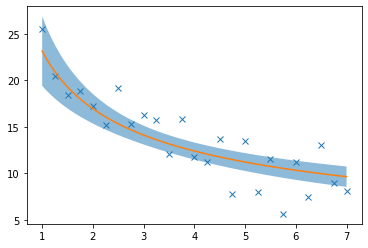

In [10]:
# test with plot
xf = Pu.xrange()
yf = Pu.predict(xf)
xc,yc = Pu.confidence_interval()
plt.plot(Pu.x, Pu.y, 'x')
plt.plot(xf, yf, '-')
plt.fill_between(xc, *yc.transpose(), alpha = 0.5)